In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import seaborn as sns

In [2]:
N = 10  # nodes
ER = bernoulli.rvs(0.15, size=(N, N))  # This is an adjacency matrix
ER

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]])

<AxesSubplot:>

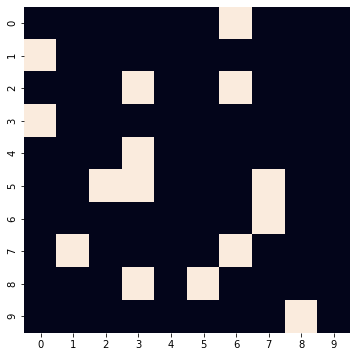

In [3]:
np.fill_diagonal(ER, 0)
plt.figure(figsize=(6,6))
sns.heatmap(ER, square=True, cbar=False)

In [4]:
adj_list = {ni: np.where(neigbors)[0] for ni, neigbors in enumerate(ER)}
adj_list

{0: array([6]),
 1: array([0]),
 2: array([3, 6]),
 3: array([0]),
 4: array([3]),
 5: array([2, 3, 7]),
 6: array([7]),
 7: array([1, 6]),
 8: array([3, 5]),
 9: array([8])}

In [5]:
[(node, neighbor) for node in adj_list for neighbor in adj_list[node]]

[(0, 6),
 (1, 0),
 (2, 3),
 (2, 6),
 (3, 0),
 (4, 3),
 (5, 2),
 (5, 3),
 (5, 7),
 (6, 7),
 (7, 1),
 (7, 6),
 (8, 3),
 (8, 5),
 (9, 8)]

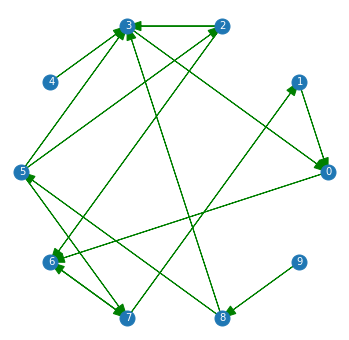

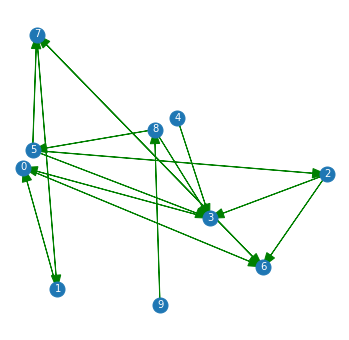

In [6]:
def draw_arc(a, b, hw = 0):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )

def draw_graph_circle(N, adj_list, offset=0.015):
    angle = np.linspace(0, 2*np.pi, N, endpoint=False)
    x = np.cos(angle)
    y = np.sin(angle)

    plt.figure(figsize=(6,6))
    plt.plot(x, y, '.', ms=30)

    for i in range(N):
        plt.text(x[i]-offset, y[i]-offset, i, c='w')
        
    e = [draw_arc([x[a], y[a]], [x[b], y[b]], 0.06) for a in adj_list for b in adj_list[a]]

    plt.axis('off')
    plt.axis('equal');
    
    
def draw_graph_random(N, adj_list, offset=0.015):
    a, b = -1, 1
    x = np.random.random(N)*(b-a) + a
    y = np.random.random(N)*(b-a) + a

    plt.figure(figsize=(6,6))
    plt.plot(x, y, '.', ms=30)

    for i in range(N):
        plt.text(x[i]-offset, y[i]-offset, i, c='w')
        
    e = [draw_arc([x[a], y[a]], [x[b], y[b]], 0.06) for a in adj_list for b in adj_list[a]]

    plt.axis('off')
    plt.axis('equal');
    
draw_graph_circle(N, adj_list)

draw_graph_random(N, adj_list)